In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from pandas import DataFrame
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('/Users/tejasgorla/VScode/MATE50001-Computing/Computing-Challenge2022/Crystal_structure.csv')
data

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,False,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952455,0.442857,cubic
5325,ZrYO3,Zr,Y,False,-,-,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,-,0.642857,cubic
5326,ZrYbO3,Zr,Yb,False,-,-,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,-,0.678571,orthorhombic
5327,ZrZnO3,Zr,Zn,False,-,-,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,-,0.528571,cubic


### A brief explanation of preprocessing:
1. Remove the NaN values for each rows. Rows with any NaN values were dropped.
2. Remove the columns compound, A , B, In literature, v(B), radius(B) as they are not required to train the model
3. First remove 0, 4, 5, 6 values for the valence A since they are not theoretically possible
4. Use tG range 0.82 to 1.10 (From literature)
5. Use mu range from 0.414 to 0.732 (From literature)
6. Use FeatureScaling (To make training the model more reliable)

['v(A)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ', 'Lowest distortion']
Lowest distortion
['v(A)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ']


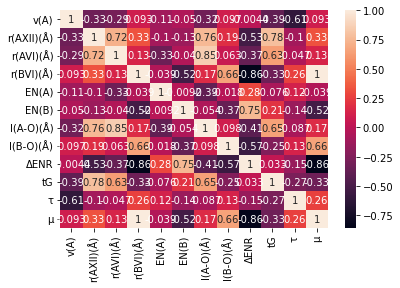

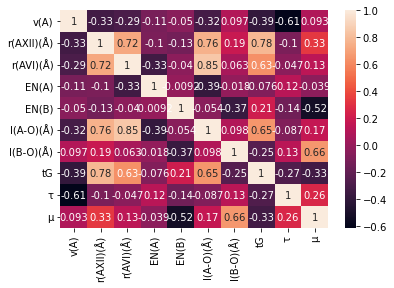

In [4]:

def stageOne(data: pd.DataFrame) -> pd.DataFrame:
    """Processes the data and returns a dataframe with only the relevant data needed to train models"""
    
    # Drop Nan Values
    df=data.copy()
    df.replace({'-':np.nan}, inplace=True) 
    df=df.dropna()    
 
    # Drop unnecessary columns
    df=df.copy().drop(["Compound","A","B","In literature","v(B)"], axis=1)
    df=df[ (df['tG']>= 0.82) & (df['tG'] <= 1.10)]
    df = df[(df['v(A)'] != '5') & (df['v(A)'] != '4') & (df['v(A)'] != '0')]
    #df=df[ (df['μ']>= 0.414) & (df['μ']<= 0.732) ]
    df= df[ (df['μ']>= 0.414)]
    columns = list(df.columns)
    print(columns)
    y_col = columns.pop(12)
    print(y_col)
    print(columns)
    
    # Split column in X, y which are the input and output variables respectively
    y = df[y_col].to_numpy()
    X = df[columns].to_numpy()
    scaler = MinMaxScaler()
    df[columns]= scaler.fit_transform(df[columns])
    
    # Generate correlation matrix for the variables
    dorrMatrix = df.corr()
    sn.heatmap(dorrMatrix, annot=True)
    plt.show()
    
    # There is a high correlation of 0.86 between Delta ENR and the μ factor so it would make sense to remove it
    
    df=df.copy().drop(["ΔENR","r(BVI)(Å)"],axis=1)
    dorrMatrix = df.corr()
    sn.heatmap(dorrMatrix, annot=True)
    plt.show()
    
    # A comparison of some sort can be shown here for the 2 matrixes i guess. low values imply that the features are ready.
        
    df=df.reset_index(drop=True)
    return df

df_pre=stageOne(data)


In [5]:
df_pre
df_pre.to_csv('Preprocessed file.csv')


In [6]:
columns=list(df_pre.columns)
y_col = columns.pop(10)
y = df_pre[y_col].to_numpy()
X = df_pre[columns].to_numpy()
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3)

In [7]:

Lr=LogisticRegression()
Lr.fit(X_train,y_train)
Lr.score(X_test,y_test)

0.676923076923077

In [8]:
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.6974358974358974

In [9]:
RF=RandomForestClassifier(n_estimators=65)
RF.fit(X_train,y_train)
RF.score(X_test,y_test)

0.7948717948717948

In [10]:
a=cross_val_score(Lr,X,y,cv=4)
a,a.mean()


(array([0.66871166, 0.72222222, 0.64814815, 0.64197531]), 0.6702643338635159)

In [11]:
cross_val_score(svm,X,y)

array([0.67692308, 0.65384615, 0.7       , 0.68461538, 0.70542636])

In [12]:
a=cross_val_score(RF,X,y,cv=4)
a,a.mean()

(array([0.66257669, 0.78395062, 0.68518519, 0.74074074]), 0.7181133075816102)

In [13]:
from sklearn.model_selection import StratifiedKFold
accuracy=[]
stk= StratifiedKFold(n_splits=10)
stk.get_n_splits(X,y)
for train_index, test_index in stk.split(X,y):
    X1_train, X1_test=X[train_index], X[test_index]
    y1_train, y1_test=y[train_index], y[test_index]
    RF.fit(X1_train,y1_train)
    prediction=RF.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)

accuracy,np.array(accuracy).mean()



([0.5692307692307692,
  0.676923076923077,
  0.8307692307692308,
  0.6615384615384615,
  0.7846153846153846,
  0.7384615384615385,
  0.6461538461538462,
  0.6923076923076923,
  0.7538461538461538,
  0.671875],
 0.7025721153846154)

KEY THINGS ABOUT THE FIRST NOTEBOOK:
We should try out a couple of other classifiers because they're not that difficult to implement and might give some better result. A cross-validation can be done for whatever classifier chosen. I used the same concepts that were also used in the research paper we found. 

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score


knc=KNeighborsClassifier(3)
knc.fit(X_train, y_train)
knc.score(X_test,y_test)
a=cross_val_score(knc,X,y,cv=10)
print(a.mean())

svc1=SVC(kernel="linear", C=0.025)
svc1.fit(X_train, y_train)
svc1.score(X_test,y_test)
b=cross_val_score(svc1,X,y,cv=10)
print(b.mean())

svc2=SVC(gamma=2, C=1)
svc2.fit(X_train, y_train)
svc2.score(X_test,y_test)
c=cross_val_score(svc2,X,y,cv=10)
print(c.mean())

gbc=GaussianProcessClassifier(1.0 * RBF(1.0))
gbc.fit(X_train, y_train)
gbc.score(X_test,y_test)
d=cross_val_score(gbc,X,y,cv=10)
print(d.mean())

dtc=DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
dtc.score(X_test,y_test)
e=cross_val_score(dtc,X,y,cv=10)
print(e.mean())

rfc=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)
f=cross_val_score(rfc,X,y,cv=10)
print(f.mean())

mlpc=MLPClassifier(alpha=1, max_iter=1000)
mlpc.fit(X_train, y_train)
mlpc.score(X_test,y_test)
g=cross_val_score(mlpc,X,y,cv=10)
print(g.mean())

abc=AdaBoostClassifier()
abc.fit(X_train, y_train)
abc.score(X_test,y_test)
h=cross_val_score(abc,X,y,cv=10)
print(h.mean())

gnbc=GaussianNB()
gnbc.fit(X_train, y_train)
gnbc.score(X_test,y_test)
i=cross_val_score(gnbc,X,y,cv=10)
print(i.mean())

# qda=QuadraticDiscriminantAnalysis()
# qda.fit(X_train, y_train)
# qda.score(X_test,y_test)
# j=cross_val_score(qda,X,y,cv=10)
# print(j.mean())

0.6886778846153846
0.5454807692307693
0.7071394230769231
0.7071394230769231
0.6764182692307693
0.6470913461538462
0.6794471153846154
0.5408413461538462
0.6331730769230768


In [15]:
knc=KNeighborsClassifier(6)
knc.fit(X_train, y_train)
knc.score(X_test,y_test)
print(knc.score(X_test,y_test))
a=cross_val_score(knc,X,y,cv=10)
print(a.mean())

0.7076923076923077
0.7040624999999999


In [16]:
svc1=SVC(kernel="linear", C=0.8)
svc1.fit(X_train, y_train)
svc1.score(X_test,y_test)
print(svc1.score(X_test,y_test))
b=cross_val_score(svc1,X,y,cv=10)
print(b.mean())

0.676923076923077
0.6824278846153847


In [17]:
svc2=SVC(gamma=8, C=1)
svc2.fit(X_train, y_train)
svc2.score(X_test,y_test)
print(svc2.score(X_test,y_test))
c=cross_val_score(svc2,X,y,cv=10)
print(c.mean())

0.7282051282051282
0.7148798076923077


In [18]:
gbc=GaussianProcessClassifier(1 * RBF(1))
gbc.fit(X_train, y_train)
gbc.score(X_test,y_test)
print(gbc.score(X_test,y_test))
d=cross_val_score(gbc,X,y,cv=10)
print(d.mean())

0.7230769230769231
0.7071394230769231


In [19]:
dtc=DecisionTreeClassifier(max_depth=7.7)
dtc.fit(X_train, y_train)
dtc.score(X_test,y_test)
print(dtc.score(X_test,y_test))
e=cross_val_score(dtc,X,y,cv=10)
print(e.mean())

0.7230769230769231
0.6717788461538461


In [20]:
rfc=RandomForestClassifier(max_depth=13, n_estimators=15, max_features=3)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)
print(rfc.score(X_test,y_test))
f=cross_val_score(rfc,X,y,cv=10)
print(f.mean())

0.8153846153846154
0.7287259615384616


In [21]:
mlpc=MLPClassifier(alpha=3, max_iter=1000)
mlpc.fit(X_train, y_train)
mlpc.score(X_test,y_test)
print(mlpc.score(X_test,y_test))
g=cross_val_score(mlpc,X,y,cv=10)
print(g.mean())

0.6820512820512821
0.6854326923076923


In [22]:
abc=AdaBoostClassifier()
abc.fit(X_train, y_train)
abc.score(X_test,y_test)
print(abc.score(X_test,y_test))
h=cross_val_score(abc,X,y,cv=10)
print(h.mean())

0.5025641025641026
0.5408413461538462


In [23]:
gnbc=GaussianNB()
gnbc.fit(X_train, y_train)
gnbc.score(X_test,y_test)
print(gnbc.score(X_test,y_test))
i=cross_val_score(gnbc,X,y,cv=10)
print(i.mean())

0.6512820512820513
0.6331730769230768


In [24]:
# qda=QuadraticDiscriminantAnalysis()
# qda.fit(X_train, y_train)
# qda.score(X_test,y_test)
# print(qda.score(X_test,y_test))
# j=cross_val_score(qda,X,y,cv=10)
# print(j.mean())